In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
# from catboost import catBoostRegressor
# from xgboost import XGBRegressor
import warnings

In [2]:

df=pd.read_csv("data/StudentsPerformance.csv")


In [3]:

X=df.drop(columns=['math score'],axis=1)
y=df['math score']


In [4]:
# create column transformeer with 3 types of treansformer
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("oneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [5]:

X=preprocessor.fit_transform(X)

In [6]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [7]:

# seperate dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

In [8]:

##create a funcrion to evalutate model
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_scor=r2_score(true,predicted)
    return mae,rmse,r2_scor

In [9]:
# beignning model training 
modles={
    "linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "k-neighbour regressor": KNeighborsRegressor(),
    "Decision tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
}
model_list=[]
r2_list=[]

for i in range (len(list(modles))):
    model=list(modles.values())[i]
    model.fit(X_train,y_train)


    # make predectiond
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2=evaluate_model(y_test,y_test_pred)
    




    print(list(modles.keys())[i])
    model_list.append(list(modles.keys())[i])

    print('model performance for training set')
    print("-  root mean squared error : {:.4f}".format(model_train_rmse))
    print("-  mean absoluate error : {:.4f}".format(model_train_mae))
    print("-  R2 score : {:.4f}".format(model_train_r2))



    print('------------------------------------------------------------')


    print('model performance for test set')
    print("-  root mean squared error : {:.4f}".format(model_train_rmse))
    print("-  mean absoluate error : {:.4f}".format(model_train_mae))
    print("-  R2 score : {:.4f}".format(model_train_r2))
    r2_list.append(model_test_r2)





    print('================================================================')
    
    print('\n')

linear Regression
model performance for training set
-  root mean squared error : 5.3274
-  mean absoluate error : 4.2788
-  R2 score : 0.8741
------------------------------------------------------------
model performance for test set
-  root mean squared error : 5.3274
-  mean absoluate error : 4.2788
-  R2 score : 0.8741


Lasso
model performance for training set
-  root mean squared error : 6.5938
-  mean absoluate error : 5.2063
-  R2 score : 0.8071
------------------------------------------------------------
model performance for test set
-  root mean squared error : 6.5938
-  mean absoluate error : 5.2063
-  R2 score : 0.8071


Ridge
model performance for training set
-  root mean squared error : 5.3233
-  mean absoluate error : 4.2650
-  R2 score : 0.8743
------------------------------------------------------------
model performance for test set
-  root mean squared error : 5.3233
-  mean absoluate error : 4.2650
-  R2 score : 0.8743


k-neighbour regressor
model performance for

In [10]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['model name','R2_score']).sort_values(by=["R2_score"],ascending=False)


,model name,R2_score
2,Ridge,0.880593
0,linear Regression,0.879740
5,Random Forest Regressor,0.852886
1,Lasso,0.825320
3,k-neighbour regressor,0.783898
4,Decision tree,0.739684


In [11]:
# LINEAR REGRESSION
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of the model is %.2f" %score)


accuracy of the model is 87.97


Text(0, 0.5, 'predicated')

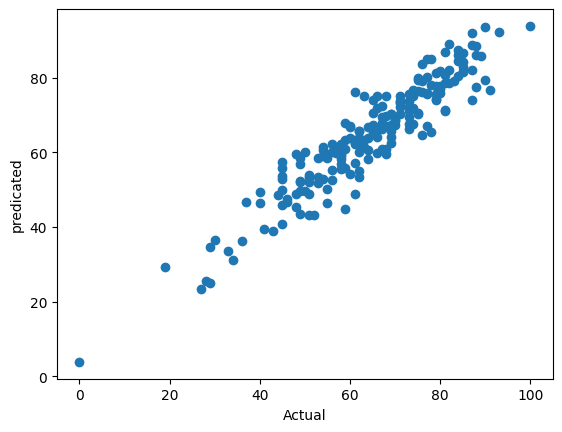

In [12]:
# plot y_pred and y_test
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicated')

<Axes: xlabel='math score'>

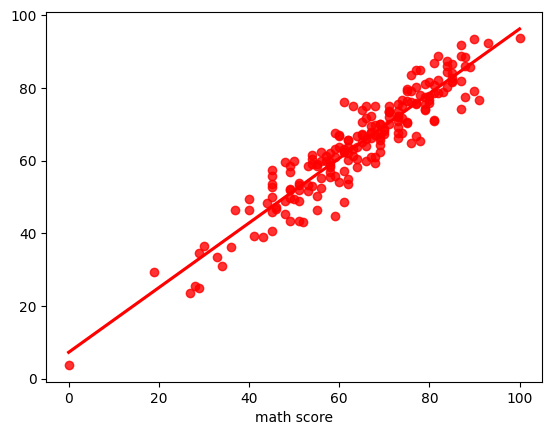

In [13]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')


In [ ]:
# Difference between actual and predicted values
pred_df=pd.DataFrame({})
pred_df

,Actual Value,predicted Value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
